In [1]:
import numpy as np
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K
from keras import optimizers

Using TensorFlow backend.


In [2]:
print(os.listdir("MalariaCell"))
parasitized_data = os.listdir('MalariaCell/Parasitized/')
uninfected_data = os.listdir('MalariaCell/Uninfected/')

['Uninfected', 'Parasitized']


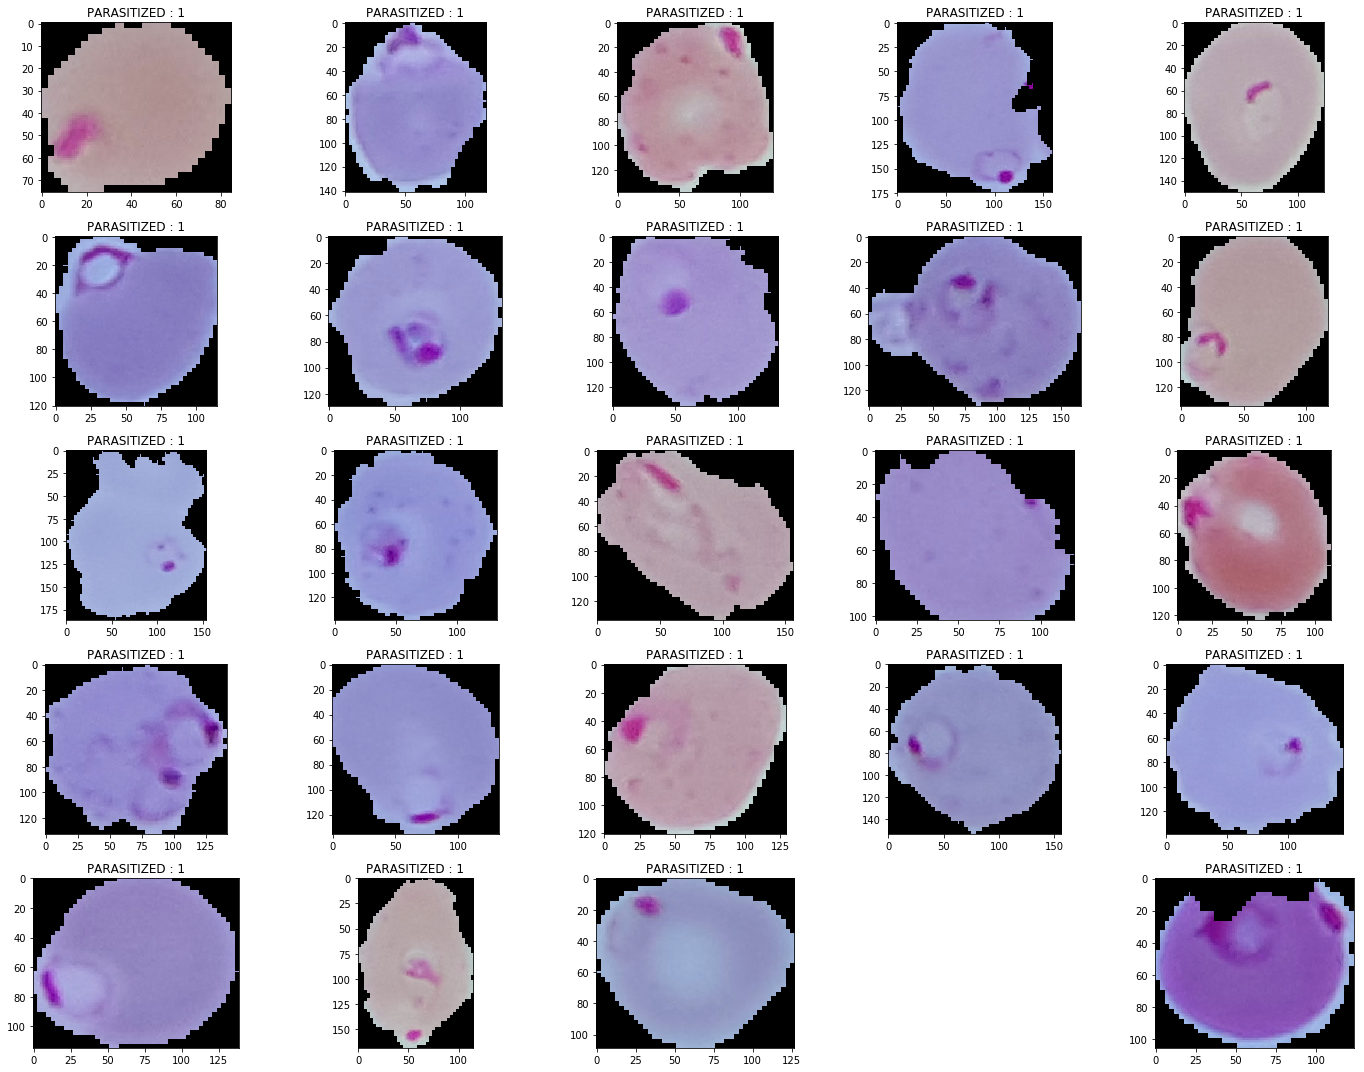

In [3]:
plt.figure(figsize = (20,15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    img = cv2.imread('MalariaCell/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

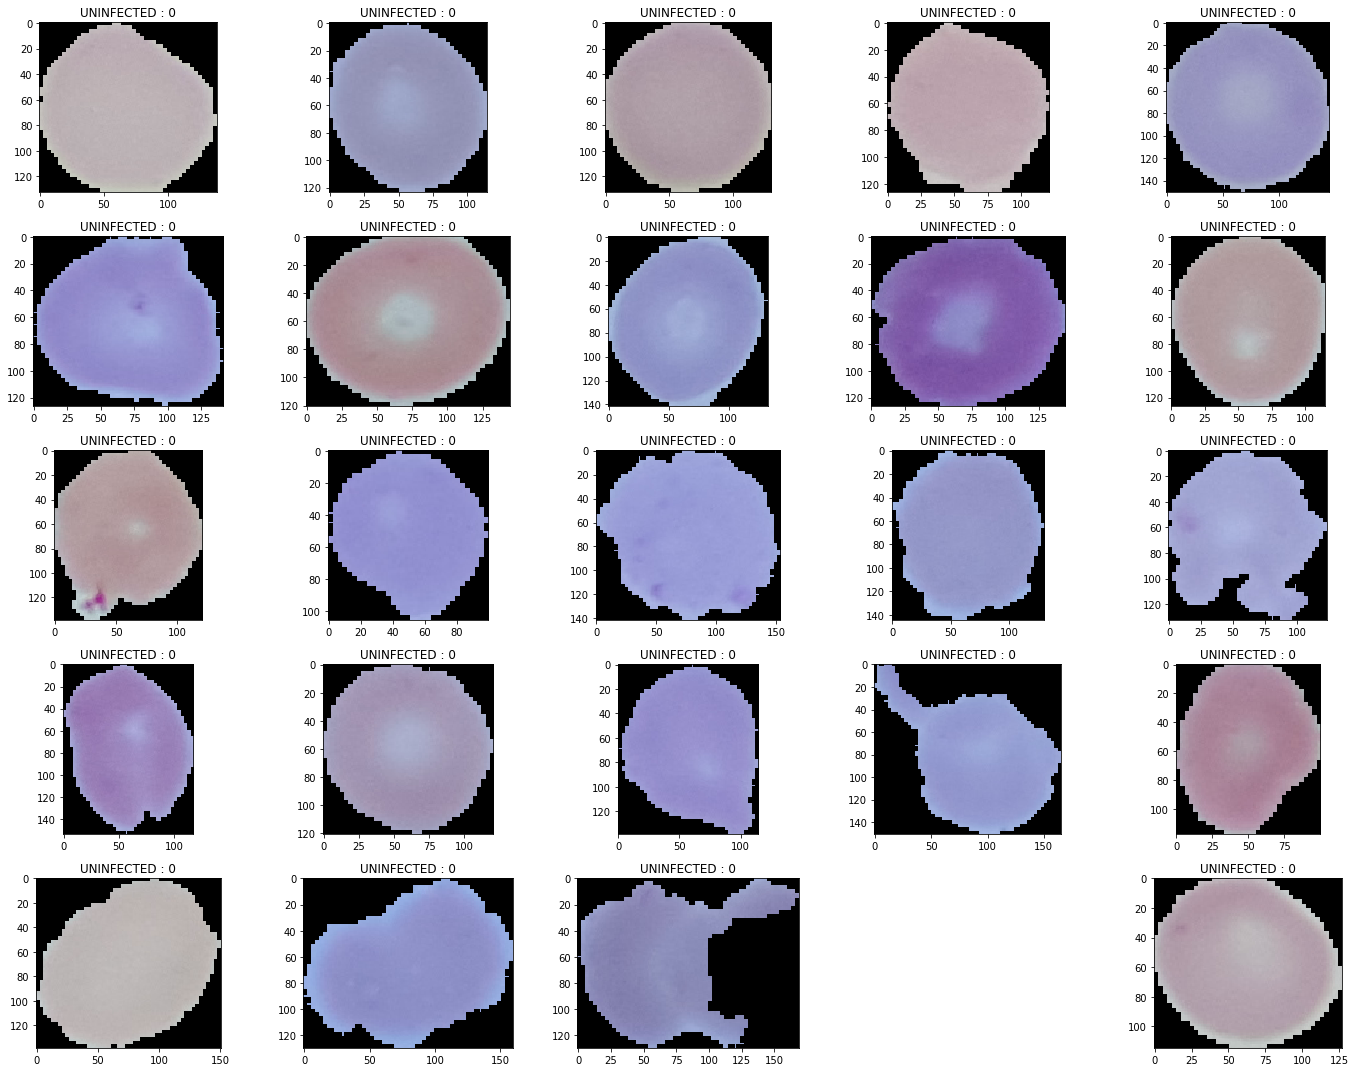

In [4]:
plt.figure(figsize = (20,15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    img = cv2.imread('MalariaCell/Uninfected' + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

In [5]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('MalariaCell/Parasitized/' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None        
for img in uninfected_data:
    try:
        img_read = plt.imread('MalariaCell/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

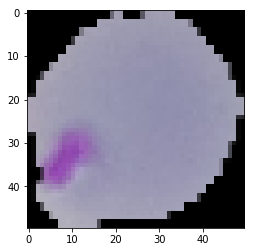

In [6]:
plt.imshow(data[0])
plt.show()

In [7]:
image_data = np.array(data)
labels = np.array(labels)
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(image_data, labels,
                                                    test_size = 0.25, random_state = 101)

In [9]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [10]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()    
    inputShape = (height, width, channels)
    chanDim = -1    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))
    model.add(Flatten())    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))    
    return model

In [11]:
height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 32)        128       
__________

In [12]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [13]:
nepoch=25;
nbatch=128
h = model.fit(x_train, y_train, epochs = nepoch, batch_size = nbatch)

Epoch 1/25
20668/20668 [==============================] - 17s 831us/step - loss: 0.7403 - acc: 0.6912
Epoch 2/25
20668/20668 [==============================] - 15s 741us/step - loss: 0.3266 - acc: 0.8642
Epoch 3/25
20668/20668 [==============================] - 15s 733us/step - loss: 0.2196 - acc: 0.9148
Epoch 4/25
20668/20668 [==============================] - 15s 717us/step - loss: 0.1794 - acc: 0.9345
Epoch 5/25
20668/20668 [==============================] - 15s 727us/step - loss: 0.1624 - acc: 0.9426
Epoch 6/25
20668/20668 [==============================] - 15s 723us/step - loss: 0.1520 - acc: 0.9463
Epoch 7/25
20668/20668 [==============================] - 15s 726us/step - loss: 0.1450 - acc: 0.9507
Epoch 8/25
20668/20668 [==============================] - 15s 724us/step - loss: 0.1384 - acc: 0.9514
Epoch 9/25
20668/20668 [==============================] - 15s 725us/step - loss: 0.1357 - acc: 0.9543
Epoch 10/25
20668/20668 [==============================] - 15s 736us/step - loss: 

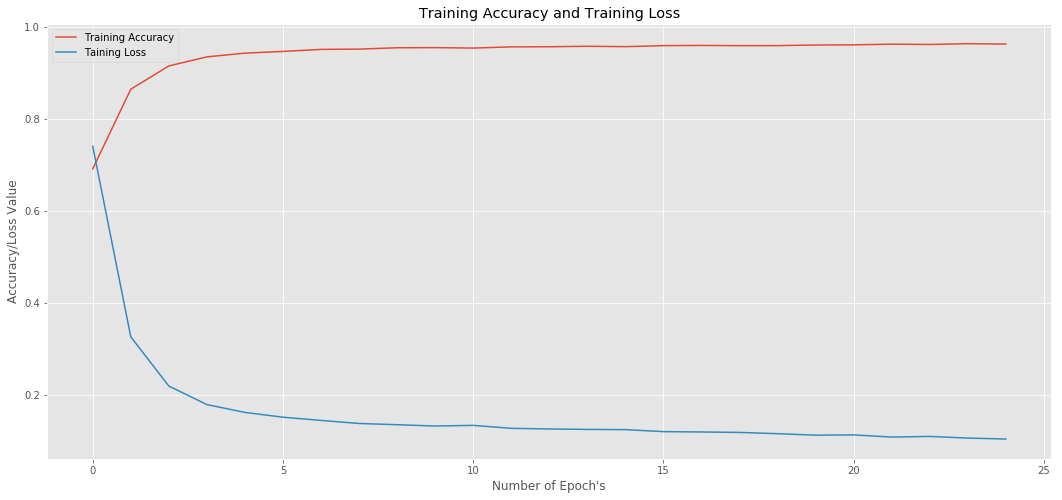

In [14]:
plt.style.use('ggplot')
plt.figure(figsize = (18,8))
plt.plot(range(nepoch), h.history['acc'], label = 'Training Accuracy')
plt.plot(range(nepoch), h.history['loss'], label = 'Taining Loss')
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")


In [15]:
predictions = model.evaluate(x_test, y_test)

6890/6890 [==============================] - 2s 321us/step


In [16]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

LOSS : 0.1767713643567223
ACCURACY : 0.9433962264150944


[]

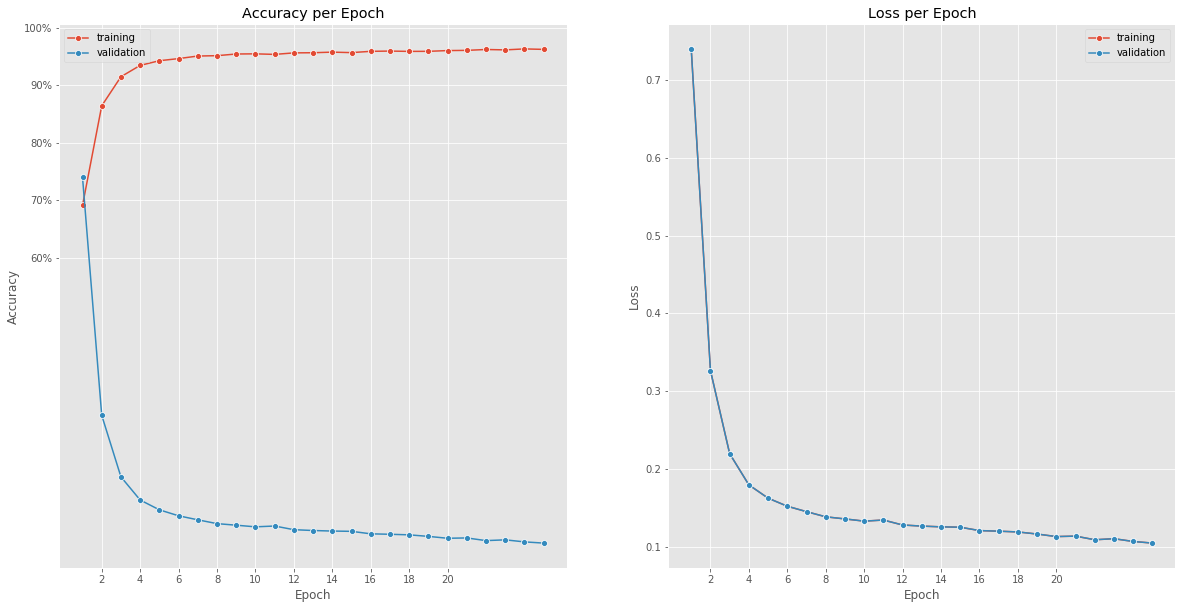

In [17]:
train_accuracy = h.history['acc']
validation_accuracy = h.history['loss']

#loss 
train_loss = h.history['loss']
validation_loss = h.history['loss']
epoch_range = range(1,len(train_accuracy)+1)
fig, ax = plt.subplots(1, 2, figsize=(20,10))

#accuracy
ax[0].set_title('Accuracy per Epoch')
sns.lineplot(x=epoch_range,y=train_accuracy,marker='o',ax=ax[0])
sns.lineplot(x=epoch_range,y=validation_accuracy,marker='o',ax=ax[0])
ax[0].legend(['training','validation'])
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].set_xticks([2,4,6,8,10,12,14,16,18,20])
ax[0].set_yticks([.6,.7,.8,.9,1.0])
ax[0].set_yticklabels(['60%','70%','80%','90%','100%'])
#loss
ax[1].set_title('Loss per Epoch')
sns.lineplot(x=epoch_range,y=train_loss,marker='o',ax=ax[1])
sns.lineplot(x=epoch_range,y=validation_loss,marker='o',ax=ax[1])
ax[1].legend(['training','validation'])
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_xticks([2,4,6,8,10,12,14,16,18,20])
plt.plot()